In [5]:
# %pip install pandas
# %pip install SQLAlchemy
# %pip install pymysql
# %pip install pm4py

In [6]:
from sqlalchemy import create_engine
import pandas as pd
import os
import pm4py
# read mysql env v

In [7]:
mysql_user = os.environ['MYSQL_USER']
mysql_password = os.environ['MYSQL_PASSWORD']
mysql_host = os.environ['MYSQL_HOST'] + ':' + os.environ['MYSQL_PORT']
mysql_db = os.environ['MYSQL_DB']


print(mysql_user, mysql_password, mysql_host, mysql_db)

# create connection string
db_connection_str = f'mysql+pymysql://{mysql_user}:{mysql_password}@{mysql_host}/{mysql_db}'
db_connection = create_engine(db_connection_str)

df = pd.read_sql('SELECT * FROM LAS2PEERMON.MESSAGE WHERE CASE_ID IS NOT NULL', con=db_connection)
df.head()

root root localhost:8085 LAS2PEERMON


,ID,EVENT,TIME_STAMP,SOURCE_NODE,SOURCE_AGENT,DESTINATION_NODE,DESTINATION_AGENT,REMARKS,CASE_ID,ACTIVITY_NAME,RESOURCE,RESOURCE_TYPE,LIFECYCLE_PHASE,TIME_OF_EVENT
0,742,SERVICE_CUSTOM_MESSAGE_1,2023-08-02 13:54:15,<0xF668F9..>,c6b9f3f5bd71935df05c9d7ad50df398,,,"{""user"": ""41de37a21eb0fbd7c8f2e57360ba443ce8f4...",4fcee552-f02c-4ad0-aaec-2ebb85817482,greeting,6840e28ea830d43602f6ace54daa268518101201855063...,bot,start,2023-08-02 11:54:15
1,743,SERVICE_CUSTOM_MESSAGE_1,2023-08-02 13:54:15,<0xF668F9..>,c6b9f3f5bd71935df05c9d7ad50df398,,,"{""user"": ""41de37a21eb0fbd7c8f2e57360ba443ce8f4...",4fcee552-f02c-4ad0-aaec-2ebb85817482,greeting,6840e28ea830d43602f6ace54daa268518101201855063...,bot,complete,2023-08-02 11:54:15
2,744,SERVICE_CUSTOM_MESSAGE_2,2023-08-02 13:54:15,<0xF668F9..>,c6b9f3f5bd71935df05c9d7ad50df398,,,"{""msg"": """"}",4fcee552-f02c-4ad0-aaec-2ebb85817482,greeting:response,6840e28ea830d43602f6ace54daa268518101201855063...,bot,start,2023-08-02 11:54:15
3,745,SERVICE_CUSTOM_MESSAGE_2,2023-08-02 13:54:15,<0xF668F9..>,c6b9f3f5bd71935df05c9d7ad50df398,,,"{""msg"": """"}",4fcee552-f02c-4ad0-aaec-2ebb85817482,greeting:response,6840e28ea830d43602f6ace54daa268518101201855063...,bot,complete,2023-08-02 11:54:15
4,746,SERVICE_CUSTOM_MESSAGE_1,2023-08-02 13:54:20,<0xF668F9..>,c6b9f3f5bd71935df05c9d7ad50df398,,,"{""user"": ""41de37a21eb0fbd7c8f2e57360ba443ce8f4...",55535729-31d9-48f3-b55f-6882615ac63e,help,6840e28ea830d43602f6ace54daa268518101201855063...,bot,start,2023-08-02 11:54:20


In [8]:
# rename columns CASE_ID->case:concept:name, ACTIVITY_NAME->concept:name, TIME_OF_EVENT->time:timestamp, LIFECYCLE_PHASE->lifecycle:transition
df.rename(columns={'CASE_ID': 'case:concept:name', 'ACTIVITY_NAME': 'concept:name', 'TIME_OF_EVENT': 'time:timestamp', 'LIFECYCLE_PHASE': 'lifecycle:transition'}, inplace=True)
# only keep events with lifecycle:transition=complete except if the EVENT is SERVICE_CUSTOM_MESSAGE_3
df = df[(df['lifecycle:transition'] == 'complete') | (df['EVENT'] == 'SERVICE_CUSTOM_MESSAGE_3')]
# append the lifecycle:transition to the concept:name for SERVICE_CUSTOM_MESSAGE_3
df.loc[df['EVENT'] == 'SERVICE_CUSTOM_MESSAGE_3', 'concept:name'] = df['concept:name'] + ' ' + df['lifecycle:transition']
df['time:timestamp'] = pd.to_datetime(df['time:timestamp'])

user_log = df[df['EVENT'] == 'SERVICE_CUSTOM_MESSAGE_1']
user_log_with_service_request = df[(df['EVENT'] == 'SERVICE_CUSTOM_MESSAGE_3') | (df['EVENT'] == 'SERVICE_CUSTOM_MESSAGE_1')]
bot_log = df[df['EVENT'] == 'SERVICE_CUSTOM_MESSAGE_2']
bot_log_with_service_response = df[(df['EVENT'] == 'SERVICE_CUSTOM_MESSAGE_3') | (df['EVENT'] == 'SERVICE_CUSTOM_MESSAGE_2')]

df.head()


,ID,EVENT,TIME_STAMP,SOURCE_NODE,SOURCE_AGENT,DESTINATION_NODE,DESTINATION_AGENT,REMARKS,case:concept:name,concept:name,RESOURCE,RESOURCE_TYPE,lifecycle:transition,time:timestamp
1,743,SERVICE_CUSTOM_MESSAGE_1,2023-08-02 13:54:15,<0xF668F9..>,c6b9f3f5bd71935df05c9d7ad50df398,,,"{""user"": ""41de37a21eb0fbd7c8f2e57360ba443ce8f4...",4fcee552-f02c-4ad0-aaec-2ebb85817482,greeting,6840e28ea830d43602f6ace54daa268518101201855063...,bot,complete,2023-08-02 11:54:15
3,745,SERVICE_CUSTOM_MESSAGE_2,2023-08-02 13:54:15,<0xF668F9..>,c6b9f3f5bd71935df05c9d7ad50df398,,,"{""msg"": """"}",4fcee552-f02c-4ad0-aaec-2ebb85817482,greeting:response,6840e28ea830d43602f6ace54daa268518101201855063...,bot,complete,2023-08-02 11:54:15
5,747,SERVICE_CUSTOM_MESSAGE_1,2023-08-02 13:54:20,<0xF668F9..>,c6b9f3f5bd71935df05c9d7ad50df398,,,"{""user"": ""41de37a21eb0fbd7c8f2e57360ba443ce8f4...",55535729-31d9-48f3-b55f-6882615ac63e,help,6840e28ea830d43602f6ace54daa268518101201855063...,bot,complete,2023-08-02 11:54:20
7,749,SERVICE_CUSTOM_MESSAGE_2,2023-08-02 13:54:20,<0xF668F9..>,c6b9f3f5bd71935df05c9d7ad50df398,,,"{""msg"": """"}",55535729-31d9-48f3-b55f-6882615ac63e,help:response,6840e28ea830d43602f6ace54daa268518101201855063...,bot,complete,2023-08-02 11:54:20
9,751,SERVICE_CUSTOM_MESSAGE_1,2023-08-02 13:54:30,<0xF668F9..>,c6b9f3f5bd71935df05c9d7ad50df398,,,"{""user"": ""41de37a21eb0fbd7c8f2e57360ba443ce8f4...",792323a1-2ae7-4c88-96d6-2751b8c8805f,menu,6840e28ea830d43602f6ace54daa268518101201855063...,bot,complete,2023-08-02 11:54:30


In [9]:

# to event log
pm4py.write_xes(df, 'test', case_id_key='case:concept:name')


/Users/lakhoune/Desktop/Repos/mobsos-event-log-generator/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
exporting log, completed traces :: 100%|██████████| 13/13 [00:00<00:00, 4043.45it/s]


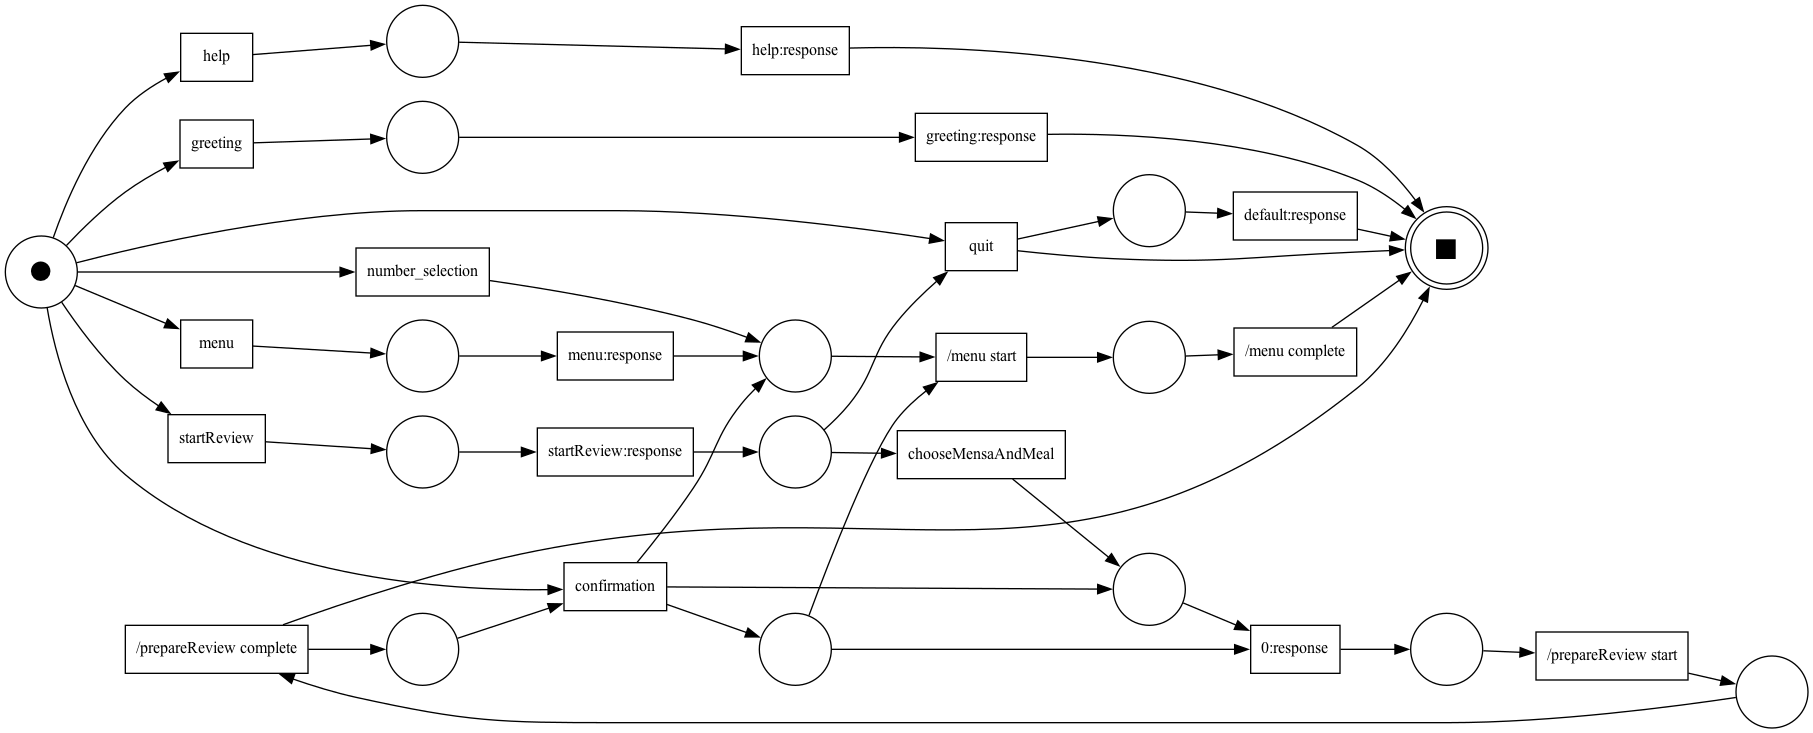

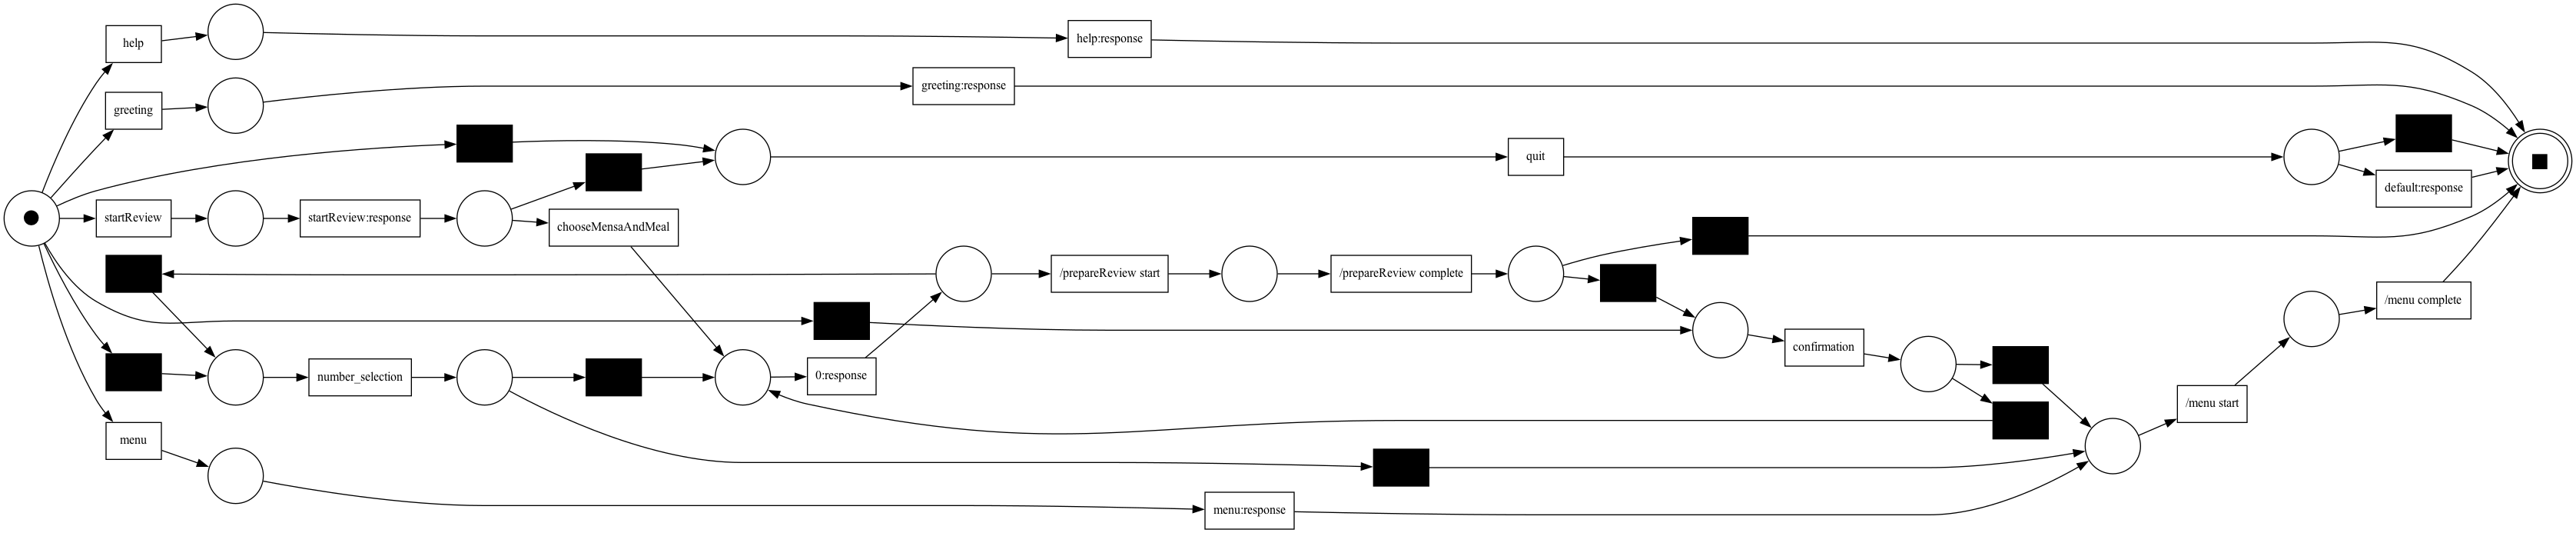

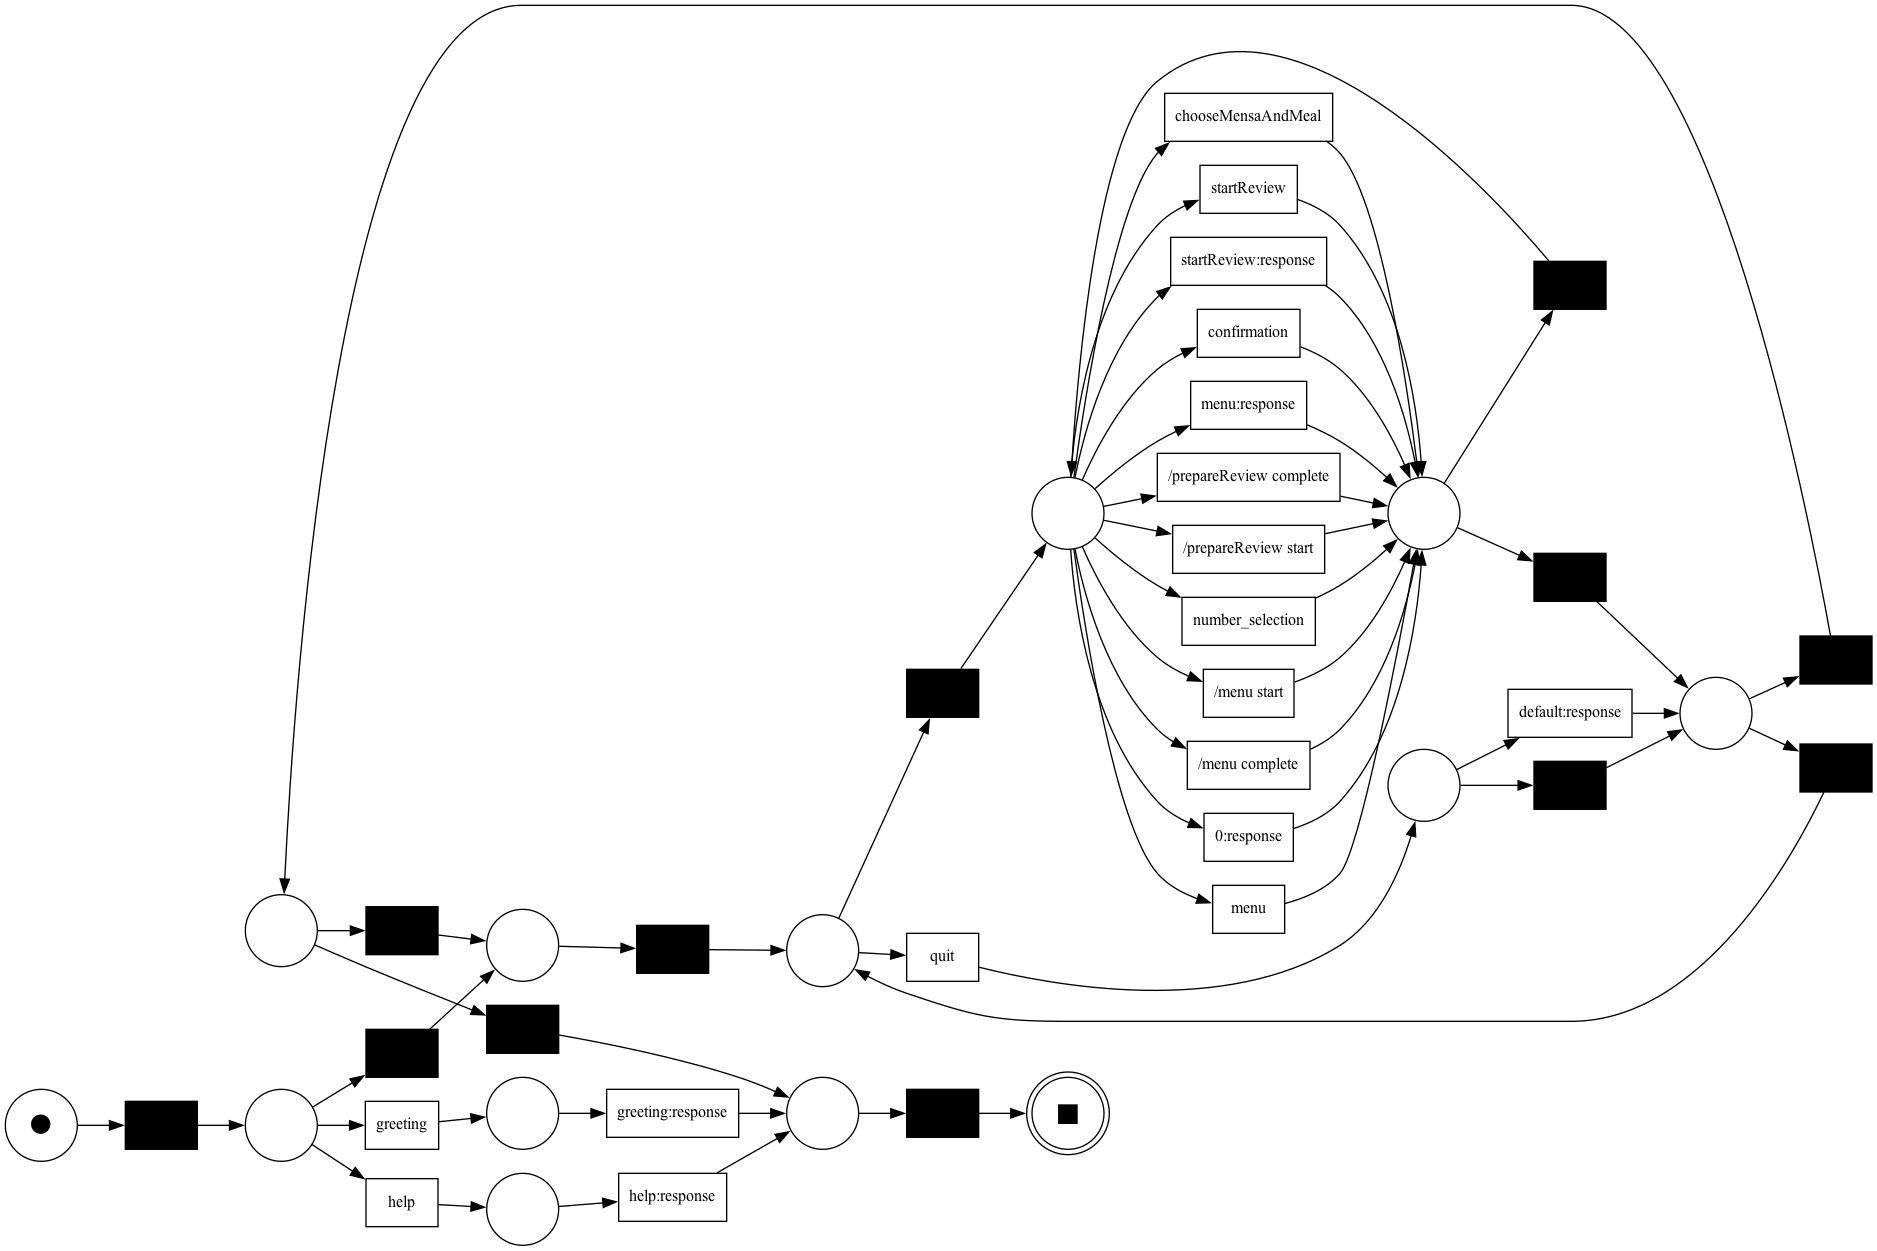

{('greeting', 'greeting:response'): 3,
 ('startReview', 'startReview:response', 'quit', 'default:response'): 1,
 ('quit',): 1,
 ('menu', 'menu:response', '/menu start', '/menu complete'): 4,
 ('help', 'help:response'): 1,
 ('number_selection', '/menu start', '/menu complete'): 1,
 ('startReview',
  'startReview:response',
  'chooseMensaAndMeal',
  '0:response',
  '/prepareReview start',
  '/prepareReview complete',
  'confirmation',
  '0:response',
  'number_selection',
  '0:response',
  '/prepareReview start',
  '/prepareReview complete'): 1,
 ('confirmation', '/menu start', '/menu complete'): 1}

In [12]:
# learn a bpmn model
petri_net_alpha, initial_marking_alpha, final_marking_alpha = pm4py.discovery.discover_petri_net_alpha(df)
petri_net_heuristics, initial_marking_heuristics, final_marking_heuristics = pm4py.discovery.discover_petri_net_heuristics(df)
petri_net_inductive, initial_marking_inductive, final_marking_inductive = pm4py.discovery.discover_petri_net_inductive(df, noise_threshold=0.2)

# visualize
pm4py.view_petri_net(petri_net_alpha, initial_marking_alpha, final_marking_alpha)
pm4py.view_petri_net(petri_net_heuristics, initial_marking_heuristics, final_marking_heuristics)
pm4py.view_petri_net(petri_net_inductive, initial_marking_inductive, final_marking_inductive)

# save the model
pm4py.write_pnml(petri_net_heuristics, initial_marking_heuristics,final_marking_heuristics,"petri_net_heuristics.pnml")

variants = pm4py.get_variants(df)   
variants

## Process from the Users perspective

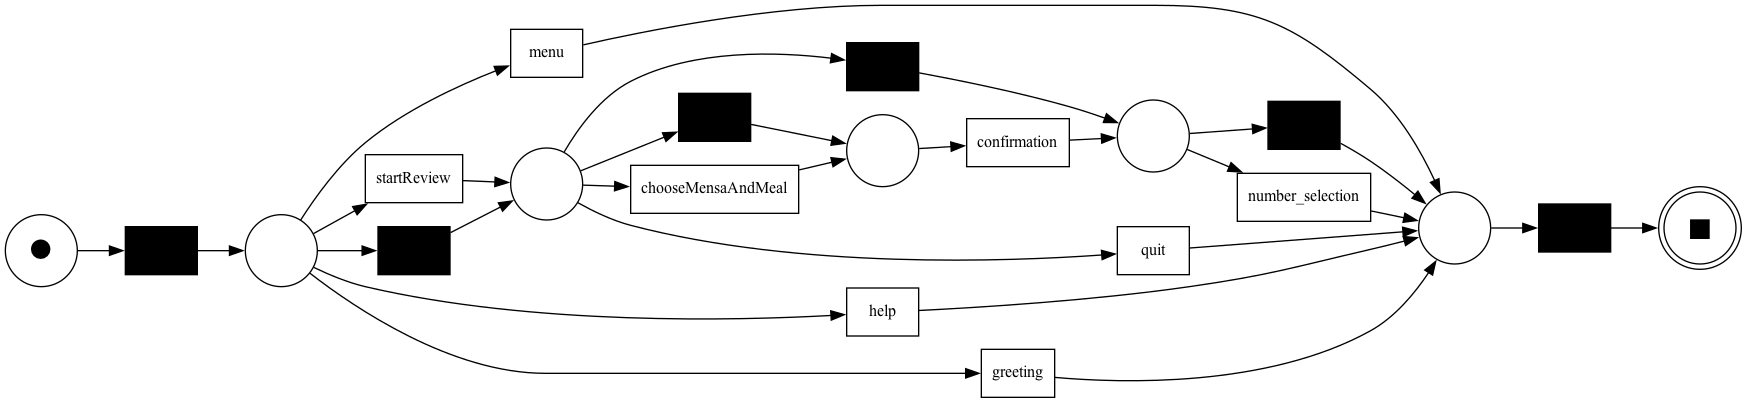

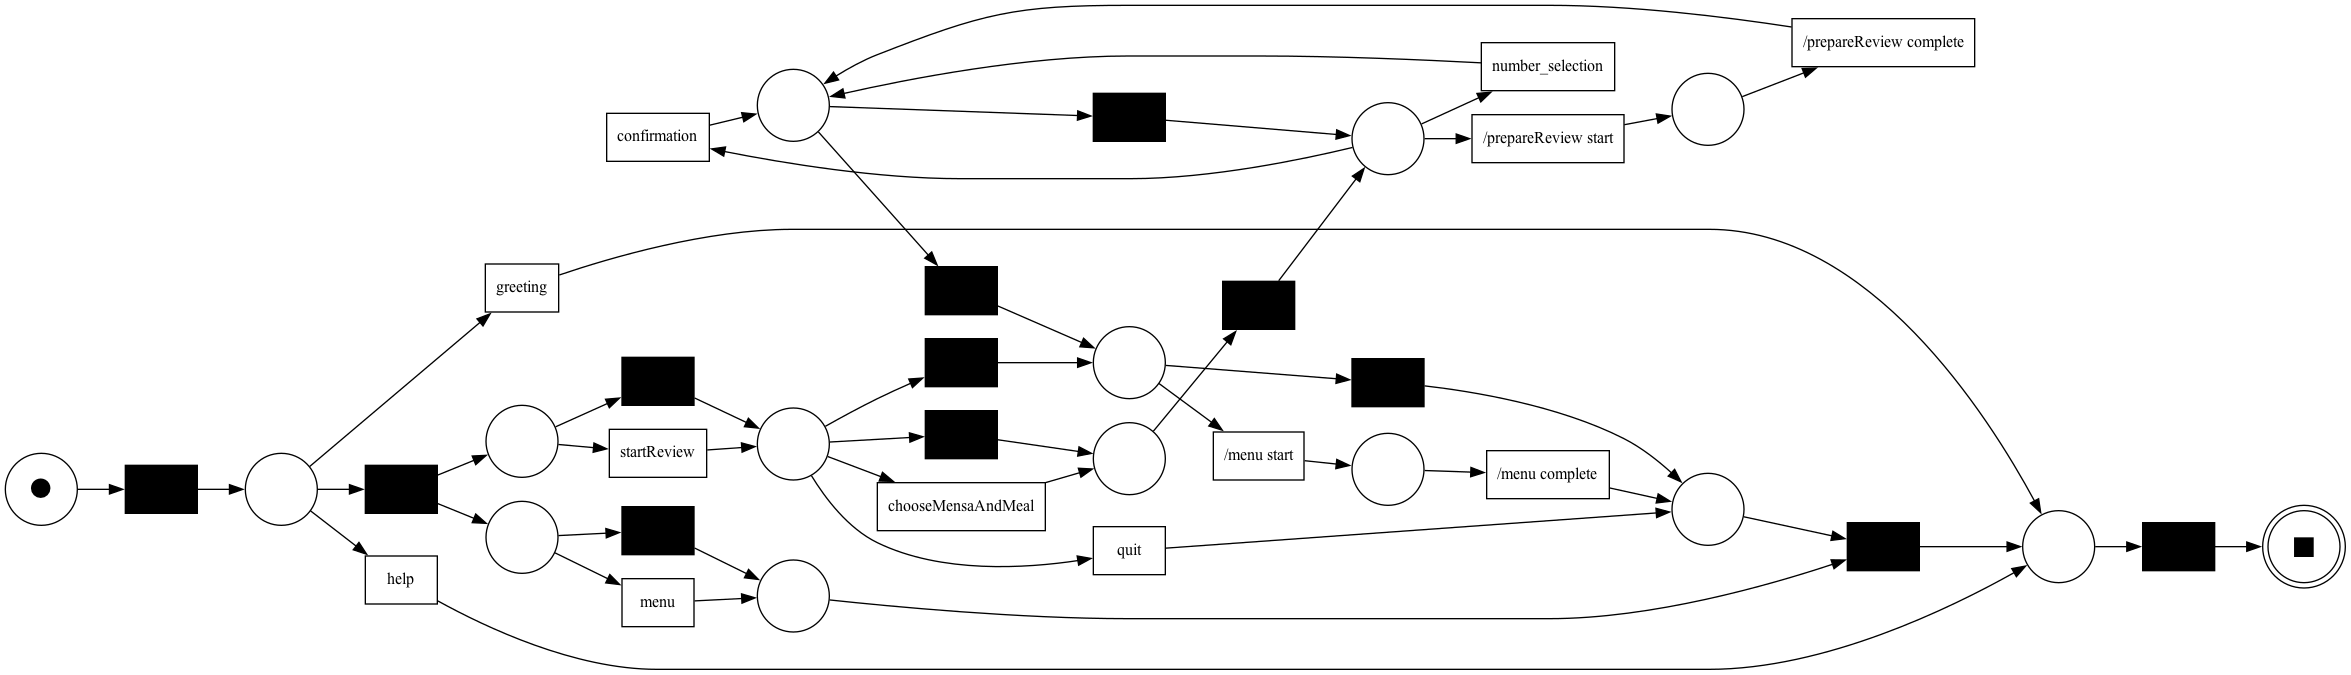

In [13]:
user_net, initial_marking_user, final_marking_user = pm4py.discovery.discover_petri_net_inductive(user_log)
pm4py.view_petri_net(user_net, initial_marking_user, final_marking_user)

user_service_net, initial_marking_user_service, final_marking_user_service = pm4py.discovery.discover_petri_net_inductive(user_log_with_service_request)
pm4py.view_petri_net(user_service_net, initial_marking_user_service, final_marking_user_service)

## Process from the Bots perspective

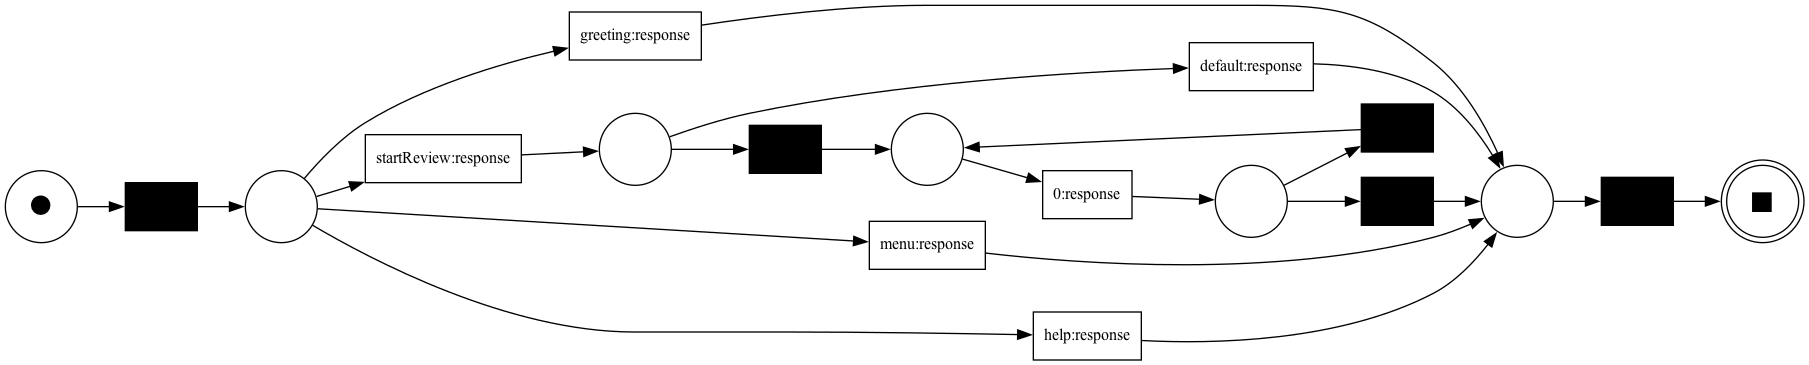

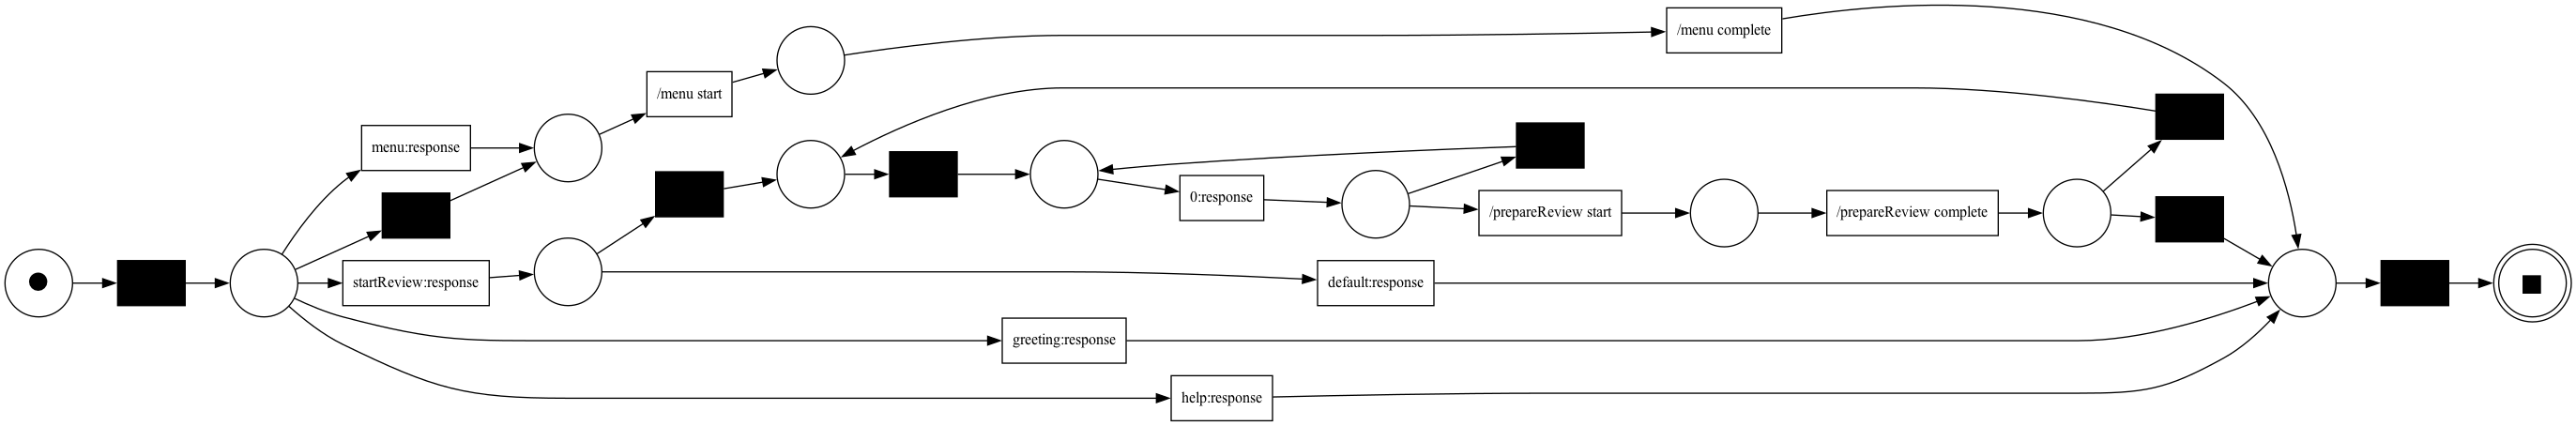

In [14]:
bot_net, initial_marking_bot, final_marking_bot = pm4py.discovery.discover_petri_net_inductive(bot_log)
pm4py.view_petri_net(bot_net, initial_marking_bot, final_marking_bot)

bot_service_net, initial_marking_bot_service, final_marking_bot_service = pm4py.discovery.discover_petri_net_inductive(bot_log_with_service_response)
pm4py.view_petri_net(bot_service_net, initial_marking_bot_service, final_marking_bot_service)